# Comparison of most frequent Words back then and now

In [85]:
import os
! pip install matplotlib
import matplotlib.pyplot as plt
corpus_path_shakespeare = "../exercise-5/corpus/"
corpus_path_corpusdata = "../exercise-10/corpus/"
file_paths_shakespeare = [os.path.join(corpus_path_shakespeare, f) for f in os.listdir(corpus_path_shakespeare) if os.path.isfile(os.path.join(corpus_path_shakespeare, f))]
file_paths_corpusdata = [os.path.join(corpus_path_corpusdata, f) for f in os.listdir(corpus_path_corpusdata) if os.path.isfile(os.path.join(corpus_path_corpusdata, f))]

using the two corpora we just loaded (shakespeare's texts and corpusdata) normalized tokens are generated. Additionally, the total count of each token in each corpus is generated:

In [17]:
tokens_shakespeare = []
for path in file_paths_shakespeare:
    with open(path, "r", encoding="utf-8") as f:
        tokens_ = f.read().split()
        tokens_shakespeare.extend([token.lower().strip().strip(".,!?[]()=-") for token in tokens_])

tokens_corpusdata = []
for path in file_paths_corpusdata:
    with open(path, "r", encoding="utf-8") as f:
        tokens_ = f.read().split()
        tokens_corpusdata.extend([token.lower().strip().strip(".:,!?[]()=-") for token in tokens_])

counts_shakespeare = {}
for token in tokens_shakespeare:
    if token in counts_shakespeare:
        counts_shakespeare[token] = counts_shakespeare[token] + 1
    else:
        counts_shakespeare[token] = 1
        
sorted_counts_shakespeare = sorted(counts_shakespeare.items(), key=lambda item: item[1], reverse=True)

counts_corpusdata = {}
for token in tokens_corpusdata:
    if token in counts_corpusdata:
        counts_corpusdata[token] = counts_corpusdata[token] + 1
    else:
        counts_corpusdata[token] = 1
        
sorted_counts_corpusdata = sorted(counts_corpusdata.items(), key=lambda item: item[1], reverse=True)
    

next, the total count of tokens for each corpus is calculated:

In [87]:
num_of_token_shakespeare = []
for token in tokens_shakespeare:
    if len(token) != 0 and not token.startswith("@"):
      num_of_token_shakespeare.append(token)

num_of_token_corpusdata = []
for token in tokens_corpusdata:
    if len(token) != 0 and not token.startswith("@"):
      num_of_token_corpusdata.append(token)

print (len(num_of_token_corpusdata))

2131087


finally, the frequency of every token is calculated:

In [88]:
frequency_shakespeare = []
for i in sorted_counts_shakespeare:
  frequency_shakespeare.append(i[1]/len(num_of_token_shakespeare))

frequency_corpusdata = []
for i in sorted_counts_corpusdata:
  frequency_corpusdata.append(i[1]/len(num_of_token_corpusdata))

print (frequency_corpusdata[:5])

[0.24790541165142482, 0.06431271928363319, 0.03765965443926034, 0.037504803886467326, 0.029660450277252875]


Wraping up the data in two nice figures which also include Zipf's law:

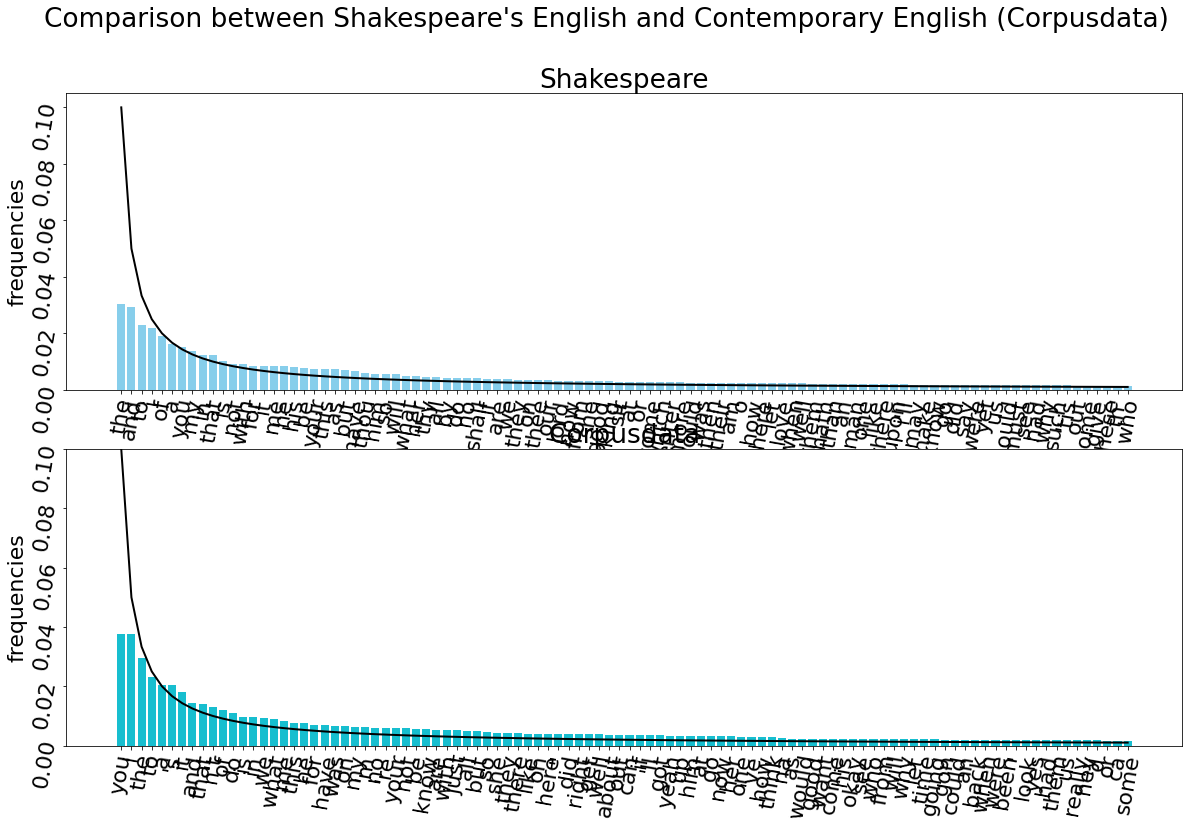

In [86]:
ranks = range(1,101)
zipf = [0.1/rank for rank in ranks]

figure, ax = plt.subplots (2,1, figsize=(20,12))
figure.suptitle("Comparison between Shakespeare's English and Contemporary English (Corpusdata)")

xs = [x[0] for x in sorted_counts_shakespeare[:100]]
ys = [x for x in frequency_shakespeare[:100]]
xc = [x[0] for x in sorted_counts_corpusdata[2:102]]
yc = [x for x in frequency_corpusdata[2:102]]

ax[0].bar(xs, ys, color="skyblue")
ax[0].plot(xs, zipf, color="black", linewidth=2)
ax[0].tick_params(labelrotation=80)
ax[0].set_ylabel("frequencies")
ax[0].set_title("Shakespeare")


ax[1].bar(xc,yc, color="tab:cyan")
ax[1].plot(xc, zipf, color="black", linewidth=2)
ax[1].tick_params(labelrotation=80)
ax[1].set_ylabel("frequencies")
ax[1].set_title("Corpusdata")

plt.ylim([0, 0.1])
plt.show()